In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [2]:
# 불러오기
Data = pd.read_csv('Input/ABC.csv')

### 데이터 전처리

In [3]:
Data.head()

,발전기명,발전용량
0,양양,"1,000"
1,북평,"1,190"
2,삼척그린,"2,044"
3,삼척,NaN
4,한울,"5,900"


In [4]:
# "," 없애기
Data['발전용량'] = Data['발전용량'].str.replace(',','')

In [5]:
# 
Data = Data.fillna(0)

In [6]:
Data['발전용량'] = Data['발전용량'].apply(lambda x : float(x))

In [7]:
Data = Data.sort_values('발전용량',ascending = False)

In [8]:
Data['지역'] = 0

In [9]:
Data = Data.reset_index().drop('index', axis = 1)

In [10]:
Data

,발전기명,발전용량,지역
0,태안,6100.00,0
1,당진,6040.00,0
2,한빛,5900.00,0
3,한울,5900.00,0
4,영흥,5080.00,0
5,신고리,4800.00,0
6,보령T/P,4500.00,0
7,하동,4000.00,0
8,"신인천, 서인천",3600.00,0
9,울산,3271.90,0


In [11]:
Test = Data['발전기명'].astype('category')

In [12]:
encode = dict(zip(Test.values,Test.cat.codes))

In [13]:
encode['태안'] = '충청남도'
encode['당진'] = '충청남도'
encode['한빛'] = '전라남도'
encode['한울'] = '경상북도'
encode['영흥'] =  '인천광역시'
encode['신고리'] = '경상남도'
encode['보령T/P'] = '충청남도'
encode['하동'] = '경상남도'
encode['신인천, 서인천'] = '인천광역시'
encode['울산'] = '경상남도'
encode['삼천포'] = '경상남도'
encode['포스코'] = '인천광역시'
encode['고리']= '경상남도'
encode['월성'] = '경상북도'
encode['삼척그린'] = '전라북도'
encode['신보령'] = '충청남도'
encode['신월성'] = '경상북도'
encode['동두천'] = '경기도'
encode['인천'] = '인천광역시'
encode['포천 '] = '경기도'
encode['평택'] = '경기도'
encode['보령 C/C'] = '충청남도'
encode['부산'] = '경상남도'
encode['북평'] = '강원도'
encode['양양'] = '강원도'
encode['광양'] = '전라남도'
encode['포천 LNG'] = '경기도'
encode['예천'] = '충청북도'
encode['서울'] = '서울특별시'
encode['산청'] = '경상남도'
encode['여수'] = '전라남도'
encode['무주'] = '전라북도'
encode['청송'] = '경상북도'
encode['안동'] = '경상북도'
encode['신한울'] = '경상북도'
encode['삼척'] = '강원도'
encode['장문'] = '경기도'

In [14]:
encode

{'태안': '충청남도',
 '당진': '충청남도',
 '한빛': '전라남도',
 '한울': '경상북도',
 '영흥': '인천광역시',
 '신고리': '경상남도',
 '보령T/P': '충청남도',
 '하동': '경상남도',
 '신인천, 서인천': '인천광역시',
 '울산': '경상남도',
 '삼천포': '경상남도',
 '포스코': '인천광역시',
 '고리': '경상남도',
 '월성': '경상북도',
 '삼척그린': '전라북도',
 '신보령': '충청남도',
 '신월성': '경상북도',
 '동두천': '경기도',
 '인천': '인천광역시',
 '포천 ': '경기도',
 '평택': '경기도',
 '보령 C/C': '충청남도',
 '부산': '경상남도',
 '북평': '강원도',
 '양양': '강원도',
 '광양': '전라남도',
 '포천 LNG': '경기도',
 '예천': '충청북도',
 '서울': '서울특별시',
 '산청': '경상남도',
 '여수': '전라남도',
 '무주': '전라북도',
 '청송': '경상북도',
 '안동': '경상북도',
 '신한울': '경상북도',
 '삼척': '강원도',
 '장문': '경기도'}

In [15]:
Data['지역'] = Data['발전기명']

In [16]:
Data['지역'] = Data['지역'].apply(lambda x : encode[x])

In [17]:
Data

,발전기명,발전용량,지역
0,태안,6100.00,충청남도
1,당진,6040.00,충청남도
2,한빛,5900.00,전라남도
3,한울,5900.00,경상북도
4,영흥,5080.00,인천광역시
5,신고리,4800.00,경상남도
6,보령T/P,4500.00,충청남도
7,하동,4000.00,경상남도
8,"신인천, 서인천",3600.00,인천광역시
9,울산,3271.90,경상남도


In [18]:
Data['발전용량'] = Data['발전용량'].apply(lambda x : round(x))

In [19]:
Table = Data['지역'].value_counts().to_frame()
display(Table)
print('지역 수 : ', Table.shape[0])

,지역
경상남도,7
경상북도,6
충청남도,5
경기도,5
인천광역시,4
전라남도,3
강원도,3
전라북도,2
충청북도,1
서울특별시,1


지역 수 :  10


In [20]:
Divide = dict(list(Data.groupby('지역')))

In [21]:
list_map = list(Divide.keys())

In [22]:
list_map

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '서울특별시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '충청남도',
 '충청북도']

In [23]:
Divide['경기도']

,발전기명,발전용량,지역
17,동두천,1717,경기도
19,포천,1450,경기도
20,평택,1400,경기도
26,포천 LNG,874,경기도
36,장문,0,경기도


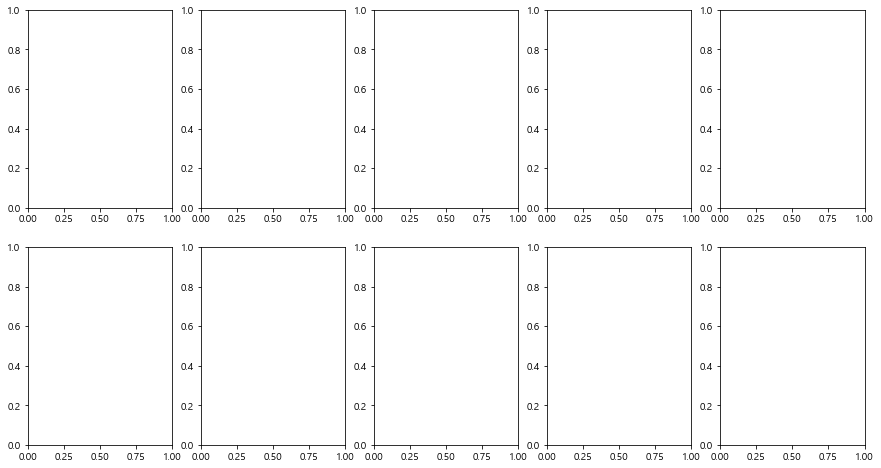

In [24]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (15,8))

axes = axs.ravel()

print(axes)

ax.patches에 관한 정보 : https://dailyheumsi.tistory.com/98 <br>
* ax.patches 는 ax가 가르키는 그래프에서, 막대들을 담고있는 리스트다.<br>
현재 그래프에는 막대가 4개이므로, 4번의 반복문을 돌 것이고, 그때마다, p는 각 막대에 대한 정보를 가리킨다.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


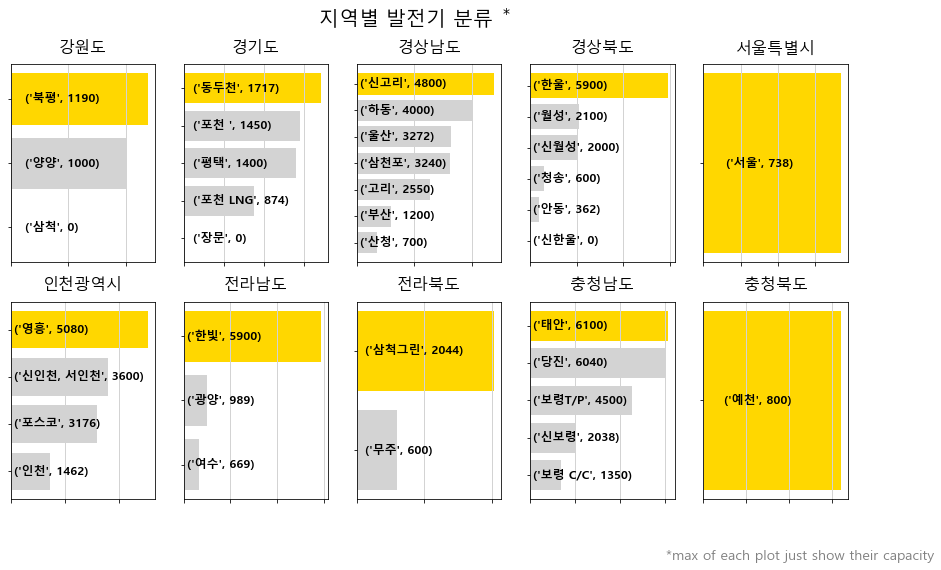

In [56]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (15,8))

axes = axs.ravel()

list_map = list(Divide.keys())

for ax,i in zip(axes,list_map):
    # print(Divide[i]['발전기명'].values,Divide[i]['발전용량'].values)
    
    temp_table = Divide[i].sort_values(by=  '발전용량',ascending = False)
    # display(temp_table)
    
    region = list(temp_table['발전기명'].values)
    
    # display(region)
    # region = list(region['발전기명'].values)
    
    capacity = list(temp_table['발전용량'].values)
    # display(capacity)
    # capacity = list(capacity['발전용량'].values)
    ax.barh(region,capacity,fc = 'lightgray')
    ax.set_yticklabels([])
    ax.invert_yaxis()
    ax.set_xticklabels([])
    ax.grid(axis = 'x', c = 'lightgray', lw = 1, alpha = 1)
    
    title = i
    ax.set_title(title, fontsize = 16, pad = 12)
    
    ax.patches[0].set_facecolor('gold')
    # display(list(zip(region,capacity)))
    for i, factory in enumerate(zip(region,capacity)):
        ax.annotate(factory,(120,i),va = 'center',fontsize = 12,weight = 'bold') # 볼드체 : weight = 'bold'
    
    # for i, num in enumerate(capacity):
      #  ax.annotate(num,(720,i),va = 'center',fontsize = 12)
    
    
fig.text(0.98, 0.02, '*max of each plot just show their capacity',ha = 'right',c = 'gray', fontsize = 14)
fig.suptitle("지역별 발전기 분류 $^*$ ",fontsize = 20)
fig.tight_layout(rect = [1,-0.05,1,1])